# Perceptron Model for Linearly Separable Data (3 Class Classification)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg

In [2]:
file1path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class1.txt"
file2path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class2.txt"
file3path = "/Users/rajeshr/Desktop/Assignment1/Group22/Classification/LS_Group22/Class3.txt"

In [3]:
def readdata(file1path, file2path, file3path):
    
    class1 = pd.read_csv(file1path, header=None, delimiter=" ")
    class2 = pd.read_csv(file2path, header=None, delimiter=" ")
    class3 = pd.read_csv(file3path, header=None, delimiter=" ")
    
    return class1, class2, class3

In [4]:
def split_data(data):
    m, n = data.shape
    l1 = int(0.6*m)
    l2 = l1 + int(0.2*m)
    training = data.iloc[:l1]
    validation = data.iloc[l1:l2]
    test = data.iloc[l2:m]
    
    return training, validation, test

In [5]:
def plotplots(class1, class2, class3):
    
    plt.scatter(class1[0], class1[1])
    plt.scatter(class2[0], class2[1])
    plt.scatter(class3[0], class3[1])
    plt.legend(['Class 1','Class 2','Class 3'])
    plt.title("Input Data")
    plt.show()

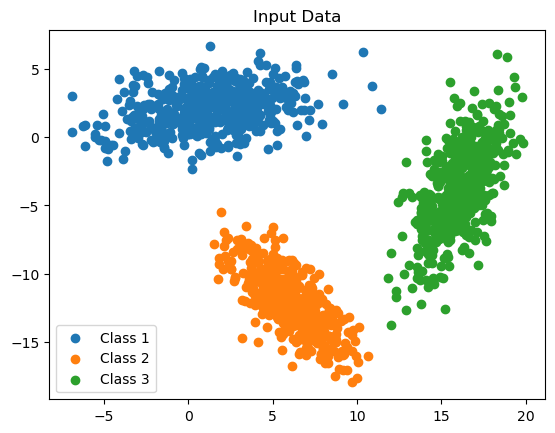

In [7]:
class1, class2, class3 = readdata(file1path, file2path, file3path)
plotplots(class1, class2, class3)

training1, validation1, test1 = split_data(class1)
training2, validation2, test2 = split_data(class2)
training3, validation3, test3 = split_data(class3)

# Training the model

In [101]:
def sigmoid(x):
    return 1/(1+np.exp(-(x)))

In [104]:
def train_data(xn, k):
    
    m, n = xn.shape
    w = np.array([1, 0, 2])
    err = []
    avg_err = []
    epoch = 100
    
    while(epoch):

        for i in range(m):

            xi = [1, xn.iloc[i, 0], xn.iloc[i, 1]]
            an = np.dot(w.T, xi) #activation function

            sn = sigmoid(an)

            if i<k:
                yn = 0
            else:
                yn = 1

            error = 0.5*(yn-sn)**2
            eta = 0.25
            err.append(error)

            del_w = eta*(yn-sn)*sn*(1-sn)
            del_w = np.dot(del_w, xi)
            #print(del_w, xi)
            w = w + del_w

        error_avg = sum(err)/len(err)
        avg_err.append(error_avg)
        
        epoch = epoch-1
    
    print("Updated weight: ", w)
    print("Average Error: ", round(error_avg, 5))
    
    return w, avg_err

### Training class1 and class2 data

In [156]:
class12Tr = training1.append(training2, ignore_index=True)
w12, avg_err12 = train_data(class12Tr, len(training1))

Updated weight:  [-4.60137179  0.10294004 -1.08478296]
Average Error:  0.00099


### Training class1 and class3 data

In [157]:
class13Tr = training1.append(training3, ignore_index=True)
w13, avg_err13 = train_data(class13Tr, len(training1))

Updated weight:  [-6.03992533  0.72742763 -0.47819599]
Average Error:  0.00123


### Training class2 and class3 data

In [158]:
class23Tr = training2.append(training3, ignore_index=True)
w23, avg_err23 = train_data(class23Tr, len(training2))

Updated weight:  [0.96254474 1.84363364 1.88671549]
Average Error:  8e-05


# Validation & Testing Functions

In [22]:
def validation(xn, w):
    
    m, n = xn.shape
    yp = []
    
    for i in range(m):
        xi = [1, xn.iloc[i, 0], xn.iloc[i, 1]]
        an = np.dot(w.T, xi)
        yi = sigmoid(an)
        yp.append(yi)

    return yp

In [152]:
def decision_boundary(all_points, data, w, name):
    
    c1x_, c2x_, c1y_, c2y_ = [], [], [], []
    
    yp = validation(all_points, w)
    m, n = all_points.shape
    for i in range(m):
        if yp[i] < 0.5:
            c1x_.append(all_points.iloc[i, 0])
            c1y_.append(all_points.iloc[i, 1])
        else:
            c2x_.append(all_points.iloc[i, 0])
            c2y_.append(all_points.iloc[i, 1])

    plt.scatter(c1x_, c1y_, marker='s', s=500)
    plt.scatter(c2x_, c2y_, marker='s', s=500)
    plt.legend(['Class '+name[0],'Class '+name[1]])
    plt.scatter(data.iloc[:,:1], data.iloc[:,1:2], edgecolors='black')

    plt.title("Decision Boundary (Class"+name[0]+name[1]+")")
    plt.tight_layout()
    plt.savefig("/Users/rajeshr/Desktop/decisionboundary_"+name[0]+name[1]+".png")
    plt.show()

### Data Processing for plotting

In [109]:
max_x_val = int(max([max(class1.iloc[0]), max(class2.iloc[0]), max(class3.iloc[0])]))
min_x_val = int(min([min(class1.iloc[0]), min(class2.iloc[0]), min(class3.iloc[0])]))
max_y_val = int(max([max(class1.iloc[1]), max(class2.iloc[1]), max(class3.iloc[1])]))
min_y_val = int(min([min(class1.iloc[1]), min(class2.iloc[1]), min(class3.iloc[1])]))

In [110]:
all_points = []
for i in range(min_x_val-5, max_x_val+5):
    for j in range(min_y_val-5, max_y_val+5):
        all_points.append([i, j])
        

all_points = pd.DataFrame(all_points)     
#all_points

# Testing

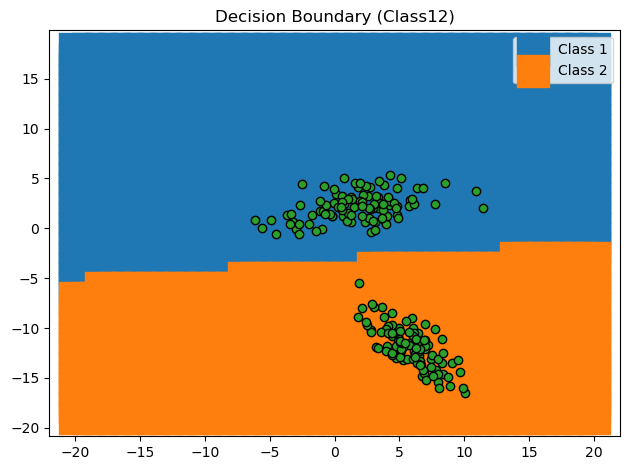

In [292]:
class12T = test1.append(test2, ignore_index=True)
decision_boundary(all_points, class12T, w12, ['1', '2'])

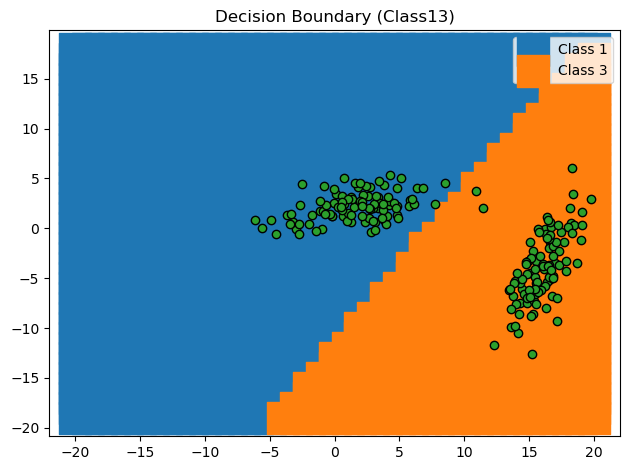

In [293]:
class13T = test1.append(test3, ignore_index=True)
decision_boundary(all_points, class13T, w13, ['1', '3'])

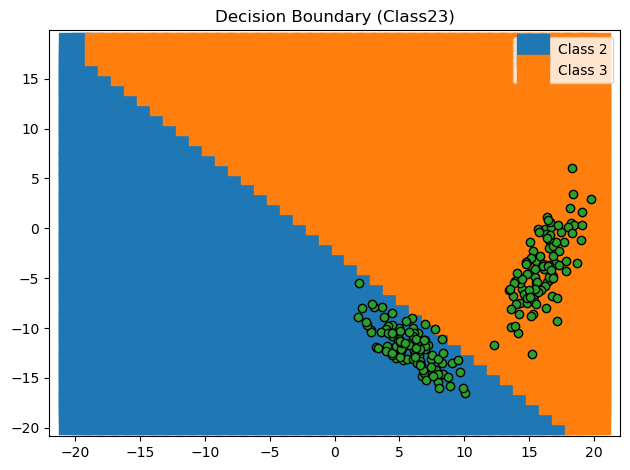

In [294]:
class23T = test2.append(test3, ignore_index=True)
decision_boundary(all_points, class23T, w23, ['2', '3'])

# Results

### 1. Average Error Vs Epoch

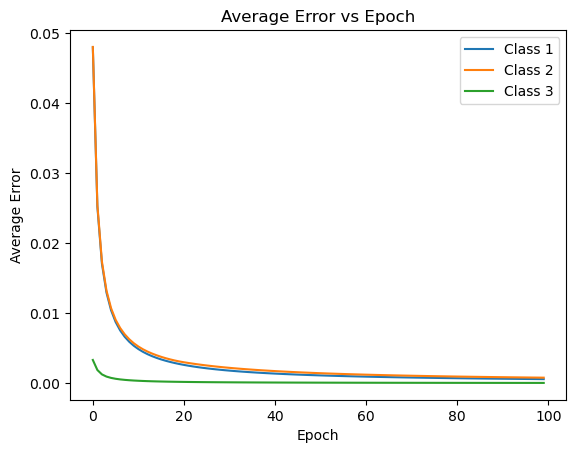

In [36]:
plt.plot(avg_err1)
plt.plot(avg_err2)
plt.plot(avg_err3)
plt.legend(['Class 1','Class 2', 'Class 3'])
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()

### 2. Confusion Matrix and Accuracy Parameters

In [269]:
def confusion_matrix(predicted, k):
    matrix = 0
    predicted = convert_labels(predicted)
    c1, c2 = 0, 0
    for i in range(len(predicted)):
        if i<k and predicted[i] == 0:
            c1 += 1
        elif i>=k and predicted[i] == 1:
            c2 += 1
            
    return [[c1, k-c1], [k-c2, c2]]

In [270]:
def convert_labels(x):
    prediction = []
    for val in x:
        if val<0.5:
            prediction.append(0)
        else:
            prediction.append(1)

    return np.array(prediction)

### Class12

In [271]:
pred12 = validation(class12T, w12)
matrix12 = confusion_matrix(pred, len(test1))
matrix12

[[100, 0], [0, 100]]

### Class13

In [272]:
pred13 = validation(class13T, w13)
matrix13 = confusion_matrix(pred, len(test1))
matrix13

[[100, 0], [0, 100]]

### Class23

In [273]:
pred13 = validation(class23T, w23)
matrix23 = confusion_matrix(pred, len(test2))
matrix23

[[100, 0], [0, 100]]

### Overall Confusion Matrix

In [274]:
c11 = matrix12[0][0]+matrix13[0][0]
c12 = matrix12[0][1]
c13 = matrix13[0][1]

c21 = matrix12[1][0]
c22 = matrix12[1][1]+matrix23[0][0]
c23 = matrix23[0][1]

c31 = matrix13[1][0]
c32 = matrix23[1][0]
c33 = matrix13[1][1]+matrix23[1][1]

confusionmatrix = [[c11, c12, c13], [c21, c22, c23], [c31, c32, c33]]
print("Confusion Matrix")
print(np.array(confusionmatrix))

Confusion Matrix
[[200   0   0]
 [  0 200   0]
 [  0   0 200]]


### Accuracy

In [275]:
accuracy = (c11+c22+c33)/(2*(len(test1)+len(test2)+len(test3)))*100
print('Accuracy = {}%'.format(accuracy))

Accuracy = 100.0%


### Precision

In [276]:
def function(x, y):
    return x/(x+y)

In [289]:
precision_1 = function(c11/2, c12+c13)
precision_2 = function(c22/2, c21+c23)
precision_3 = function(c33/2, c31+c32)
print('Precision\nClass1 = {}, Class2 = {}, Class3 = {}'.format(precision_1, precision_2, precision_3))

print("Average Precision: ", (precision_1+precision_2+precision_3)/3)

Precision
Class1 = 1.0, Class2 = 1.0, Class3 = 1.0
Average Precision:  1.0


### Recall

In [290]:
recall_1 = function(c11/2, c21+c31)
recall_2 = function(c22/2, c12+c32)
recall_3 = function(c33/2, c13+c23)
print('Precision\nClass1 = {}, Class2 = {}, Class3 = {}'.format(precision_1, precision_2, precision_3))

print("Average Recall: ", (recall_1+recall_2+recall_3)/3)

Precision
Class1 = 1.0, Class2 = 1.0, Class3 = 1.0
Average Recall:  1.0


### F measure

In [291]:
f_measure1 = (2*precision_1*recall_1)/(precision_1+recall_1)
f_measure2 = (2*precision_2*recall_2)/(precision_2+recall_2)
f_measure3 = (2*precision_3*recall_3)/(precision_1+recall_3)
print('F Score\nClass1 = {}, Class2 = {}, Class3 = {}'.format(f_measure1, f_measure2, f_measure3))

print("Average F-measure: ", (f_measure1+f_measure2+f_measure3)/3)

F Score
Class1 = 1.0, Class2 = 1.0, Class3 = 1.0
Average F-measure:  1.0
